In [1]:
import gym
import gym_battleship1

import tensorflow as tf
import h5py
import numpy as np

import tensorflow.keras.losses
tensorflow.keras.losses.custom_loss = tf.nn.sigmoid_cross_entropy_with_logits

tf.keras.backend.set_image_data_format('channels_last')
from customs import customAccuracy, buildModel

from matplotlib import pyplot

env = gym.make('battleship1-v1')
env.reset()

# model.summary()
model = buildModel()
model.load_weights('saved_model/leviathan.h5', skip_mismatch=True, by_name=True) #unec?
weights = h5py.File('saved_model/leviathan.h5', 'r')
if tensorflow.keras.backend.image_data_format() == "channels_last":
	LCWeights = weights['model_weights']['locally_connected2d']['locally_connected2d']
	unrolled = LCWeights['kernel:0'][()]
	LCKern = np.array(unrolled)
	LCKern = np.transpose(LCKern, [1,2,0,3,4,5])
	LCKern = np.transpose(LCKern, [0,1,2,4,5,3])
	LCWeights = [LCKern, LCWeights['bias:0'][()]]
	model.layers[-2].set_weights(LCWeights)

# displayKernel(-2)
def scaler(x):
	if x.value[1] == "!M!":
		return -2
	elif '(' in x.value[1]:
		return 2
	return x.value[0]

vfunc = np.vectorize(scaler)
def heatMap(y_preds, state=None):
# 	pyplot.close()
	y_preds = np.reshape(y_preds, (10,10))
	ax = pyplot.subplot(1,2,1)
	pyplot.imshow(y_preds, cmap='gray')
	if state is not None:
		bx = pyplot.subplot(1,2,2)
		x = np.array(state)
		x = np.sum(x, axis=0 if tensorflow.keras.backend.image_data_format() == "channels_first" else -1)
		pyplot.imshow(x, cmap='gray', vmin=-1, vmax=1)
	pyplot.show()

Instructions for updating:
Use `tf.linalg.matmul` instead


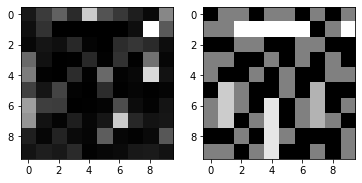

TopKV2(values=<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[0.06406763, 0.05447063, 0.05100062]], dtype=float32)>, indices=<tf.Tensor: shape=(1, 3), dtype=int32, numpy=array([[18, 48,  4]], dtype=int32)>)
B9


In [56]:
sitRepA = [
    [-1,0,0,-1,0,0,-1,0,-1,0], #A
    [0,0,0,0,0,0,0,-1,0,1], #B
    [-1,-1,0,0,-1,-1,0,0,-1,-1], #C
    [0,0,-1,-1,0,-1,0,-1,0,-1], #D
    [0,-1,-1,0,-1,0,-1,-1,0,0], #E
    [-1,0,0,-1,-1,0,-1,0,-1,-1], #F
    [0,0,0,-1,0,-1,0,0,-1,0], #G
    [0,0,-1,0,0,-1,0,0,0,-1], #H
    [-1,-1,0,-1,0,0,-1,-1,-1,0], #I
    [0,0,-1,0,0,-1,-1,0,-1,0], #J
]
sitRepB = [
    [0,0,0,0,0,0,0,0,0,0], #A
    [0,0,1.0,1.0,1.0,1.0,1.0,0,0,0], #B
    [0,0,0,0,0,0,0,0,0,0], #C
    [0,0,0,0,0,0,0,0,0,0], #D
    [0,0,0,0,0,0,0,0,0,0], #E
    [0,0.6,0,0,0,0,0,0.4,0,0], #F
    [0,0.6,0,0,0.8,0,0,0.4,0,0], #G
    [0,0.6,0,0,0.8,0,0,0.4,0,0], #H
    [0,0,0,0,0.8,0,0,0,0,0], #I
    [0,0,0,0,0.8,0,0,0,0,0], #J
]
# sitRep = [
#     [0,0,0,0,0,0,0,0,0,0] #A
#     [0,0,0,0,0,0,0,0,0,0] #B
#     [0,0,0,0,0,0,0,0,0,0] #C
#     [0,0,0,0,0,0,0,0,0,0] #D
#     [0,0,0,0,0,0,0,0,0,0] #E
#     [0,0,0,0,0,0,0,0,0,0] #F
#     [0,0,0,0,0,0,0,0,0,0] #G
#     [0,0,0,0,0,0,0,0,0,0] #H
#     [0,0,0,0,0,0,0,0,0,0] #I
#     [0,0,0,0,0,0,0,0,0,0] #J
# ]
obs = tf.convert_to_tensor([[sitRepA, sitRepB]])
obs = tf.transpose(obs, [0,2,3,1])
preds = model.predict(obs)
heatMap(preds, obs.numpy()[0])
topK = tf.math.top_k(preds, k=3)
print(topK)
k = tf.argmax(preds,-1).numpy()[0]
if k // 10 == 0:
    print('A' + str((k % 10) + 1))
elif k // 10 == 1:
    print('B' + str((k % 10) + 1))
elif k // 10 == 2:
    print('C' + str((k % 10) + 1))
elif k // 10 == 3:
    print('D' + str((k % 10) + 1))
elif k // 10 == 4:
    print('E' + str((k % 10) + 1))
elif k // 10 == 5:
    print('F' + str((k % 10) + 1))
elif k // 10 == 6:
    print('G' + str((k % 10) + 1))
elif k // 10 == 7:
    print('H' + str((k % 10) + 1))
elif k // 10 == 8:
    print('I' + str((k % 10) + 1))
elif k // 10 == 9:
    print('J' + str((k % 10) + 1))